In [1]:
import os, sys
# for accessing src, stan, etc.
sys.path.append(os.path.abspath(os.path.join("../..")))

import bayesflow as bf
import numpy as np
from matplotlib import pyplot as plt
from src.models.HmmEam import model, unconstrain_parameters, constrain_parameters, configurator

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
INFO:root:Performing 2 pilot runs with the anonymous model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 8)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 400, 3)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.


In [2]:
df = model(10_000)

In [3]:
rts = df['sim_data'][...,0]

In [4]:
conf_df = configurator(df)

In [5]:
np.isnan(df['prior_draws']).any()

False

In [6]:
np.isnan(conf_df['posterior_inputs']['parameters']).any()

False

[0.80033053 0.79962086 0.52884799 2.02775554 5.51500177 2.49741514
 5.01759807 0.2020394 ]


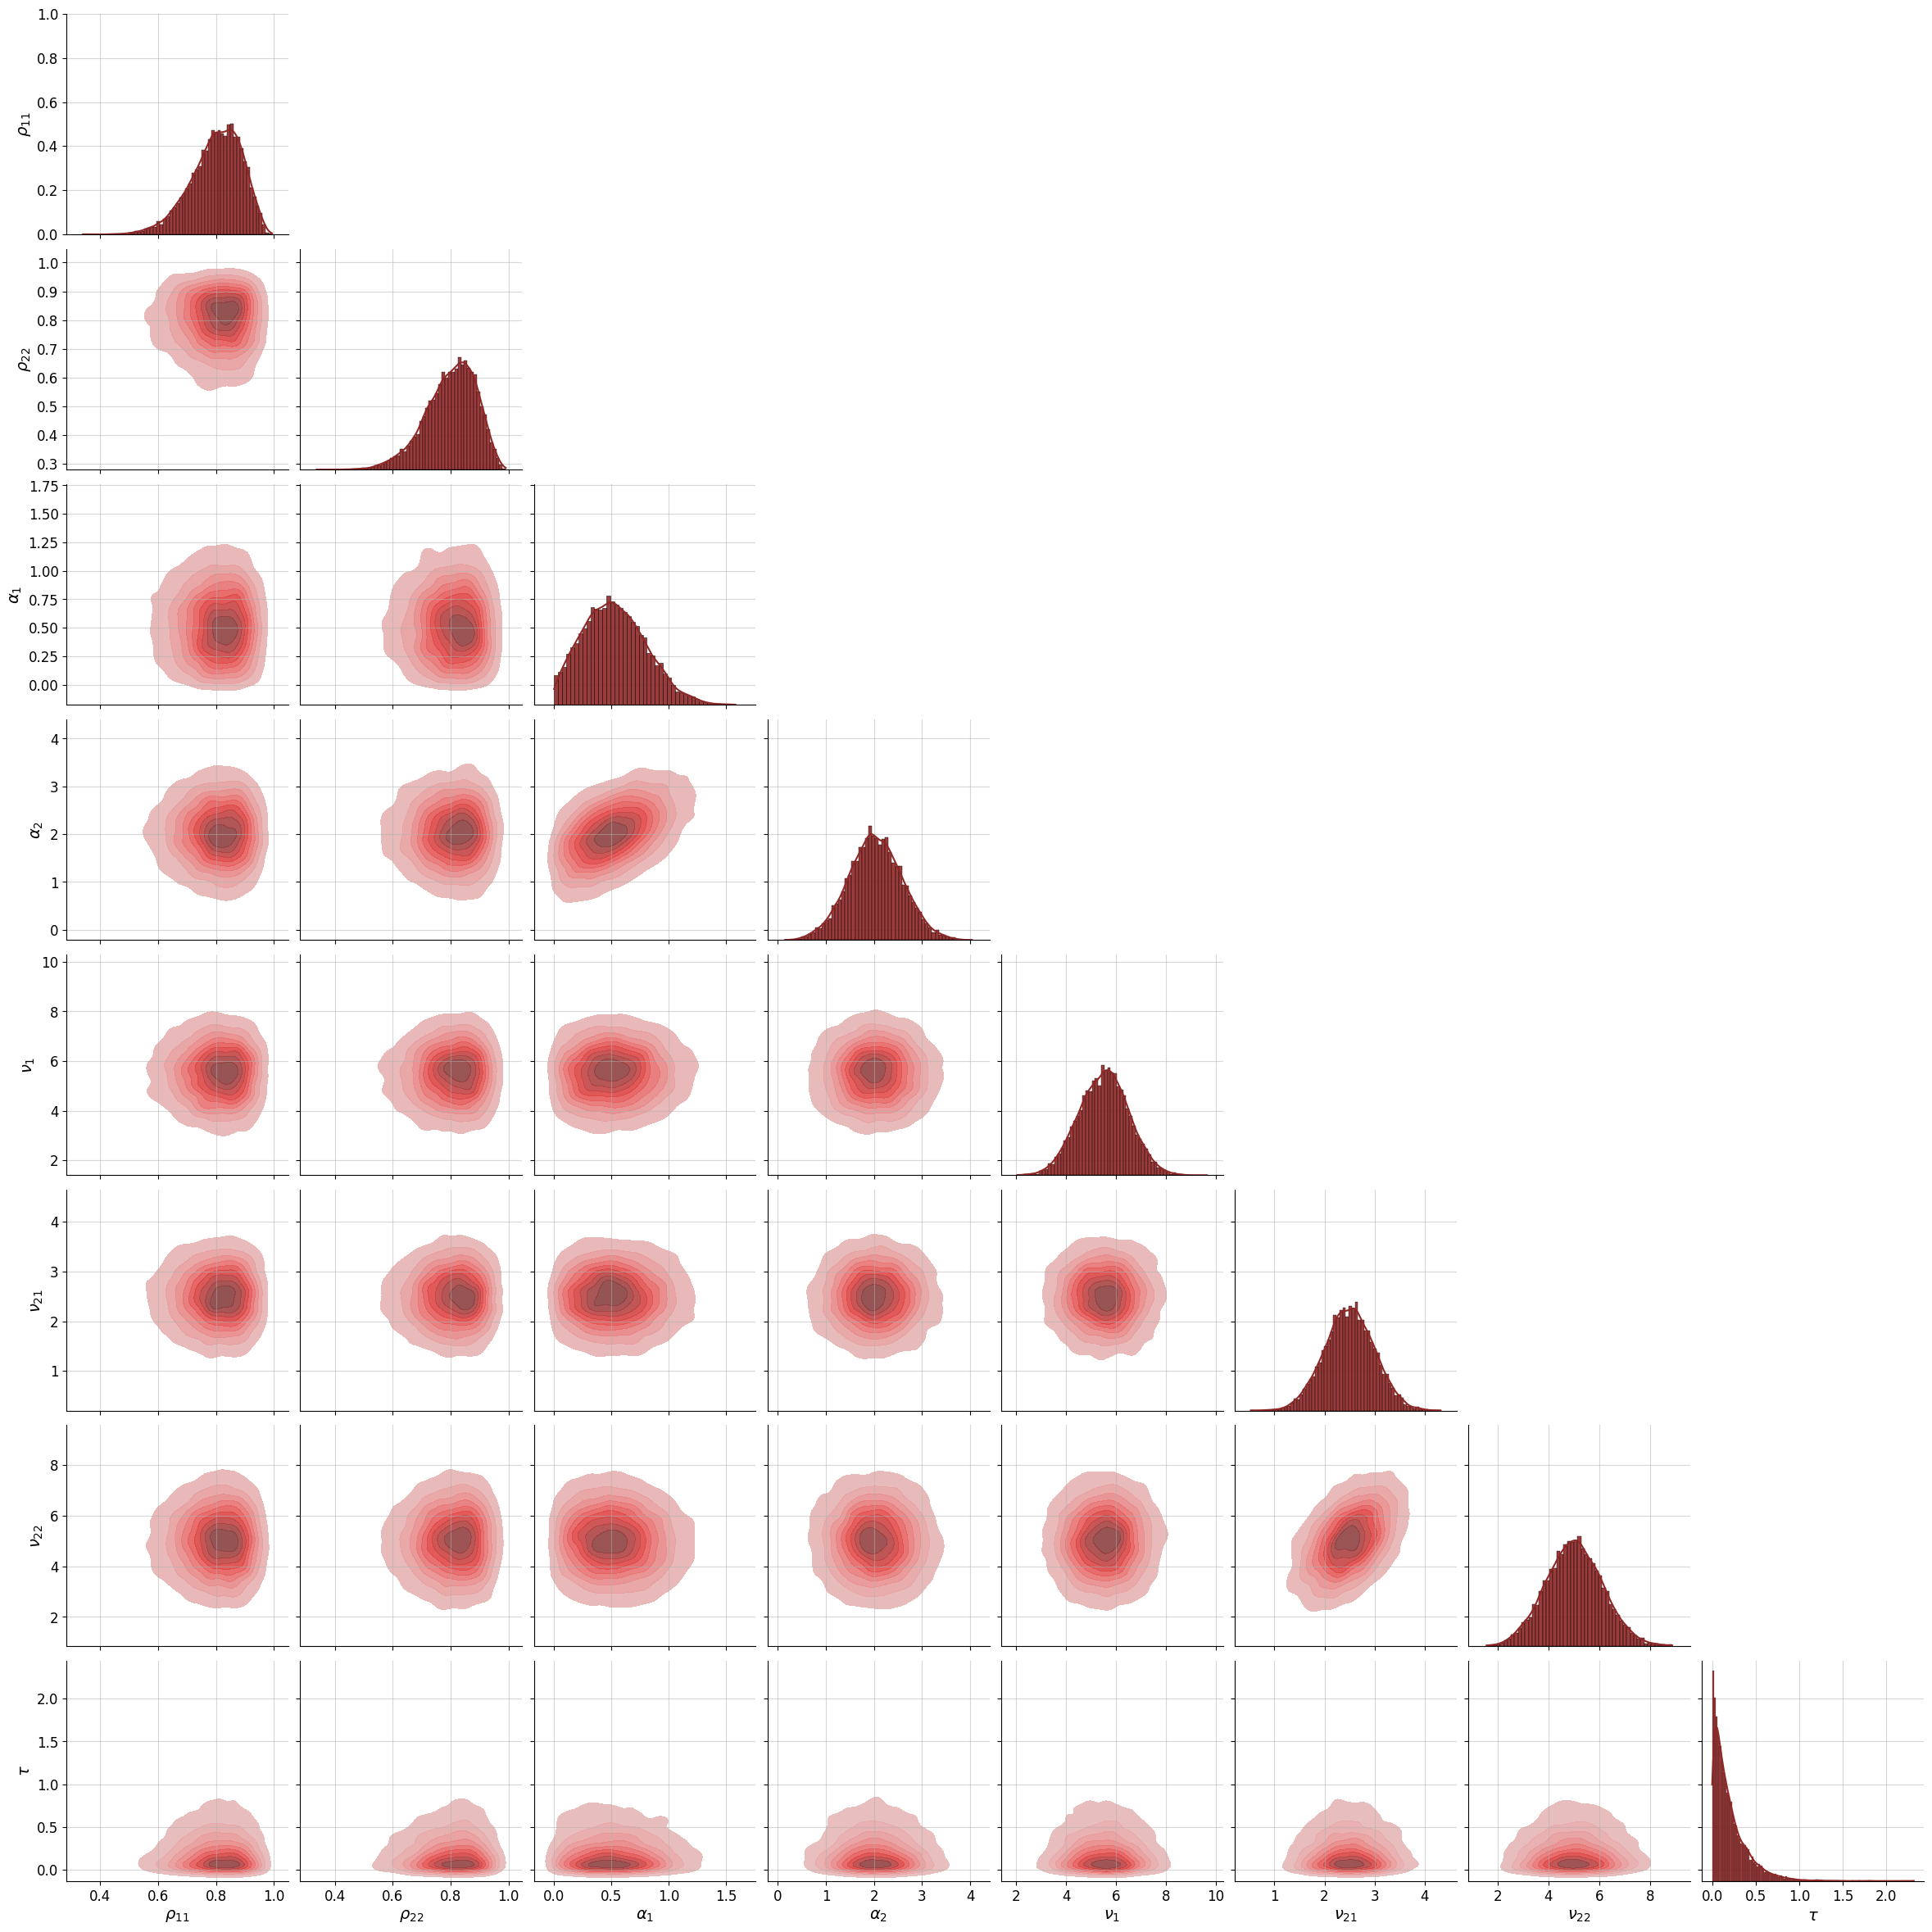

In [7]:
par = df['prior_draws']
print(np.mean(par, axis=0))
f=bf.diagnostics.plot_posterior_2d(par, param_names=model.param_names["constrained"])

[ 1.48776358  1.48230682 -0.83507328  0.33555988  1.69042889  0.89422024
  0.82279687  2.05944578]


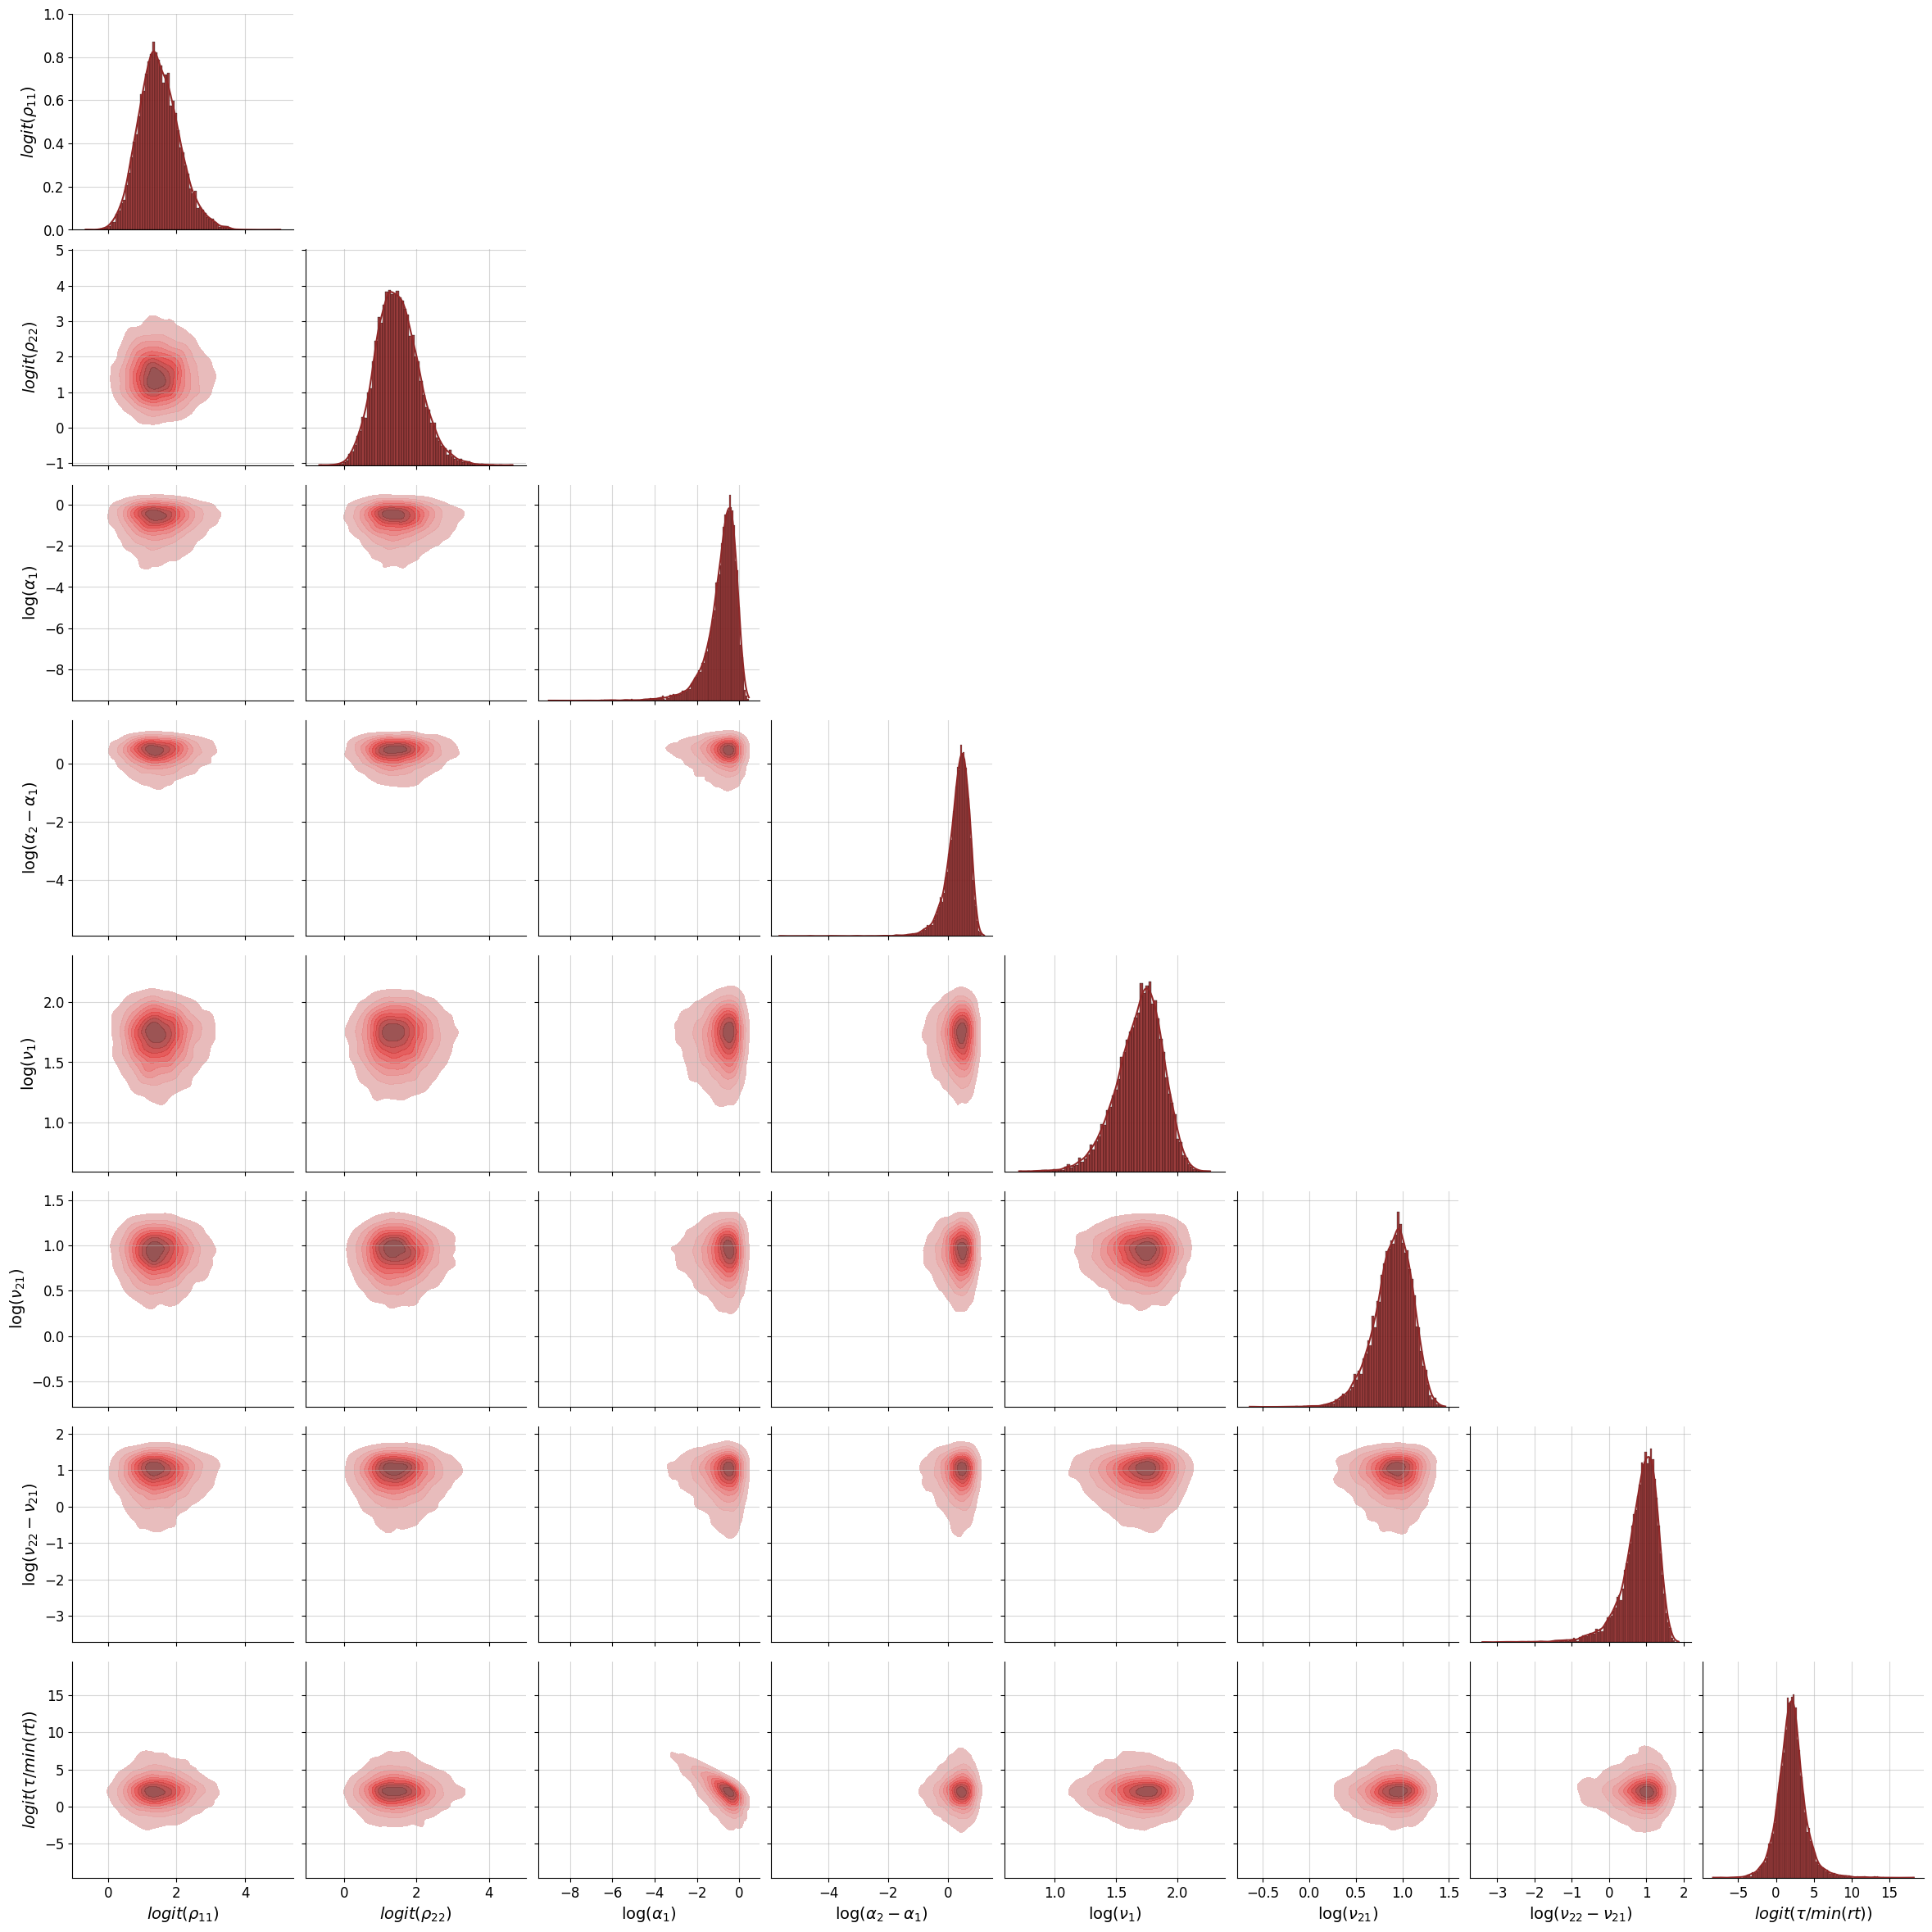

In [8]:
par = unconstrain_parameters(par, rts)
print(np.mean(par, axis=0))
f=bf.diagnostics.plot_posterior_2d(par, param_names=model.param_names["unconstrained"])

[0.80033053 0.79962086 0.52884799 2.02775554 5.51500177 2.49741514
 5.01759807 0.2020394 ]


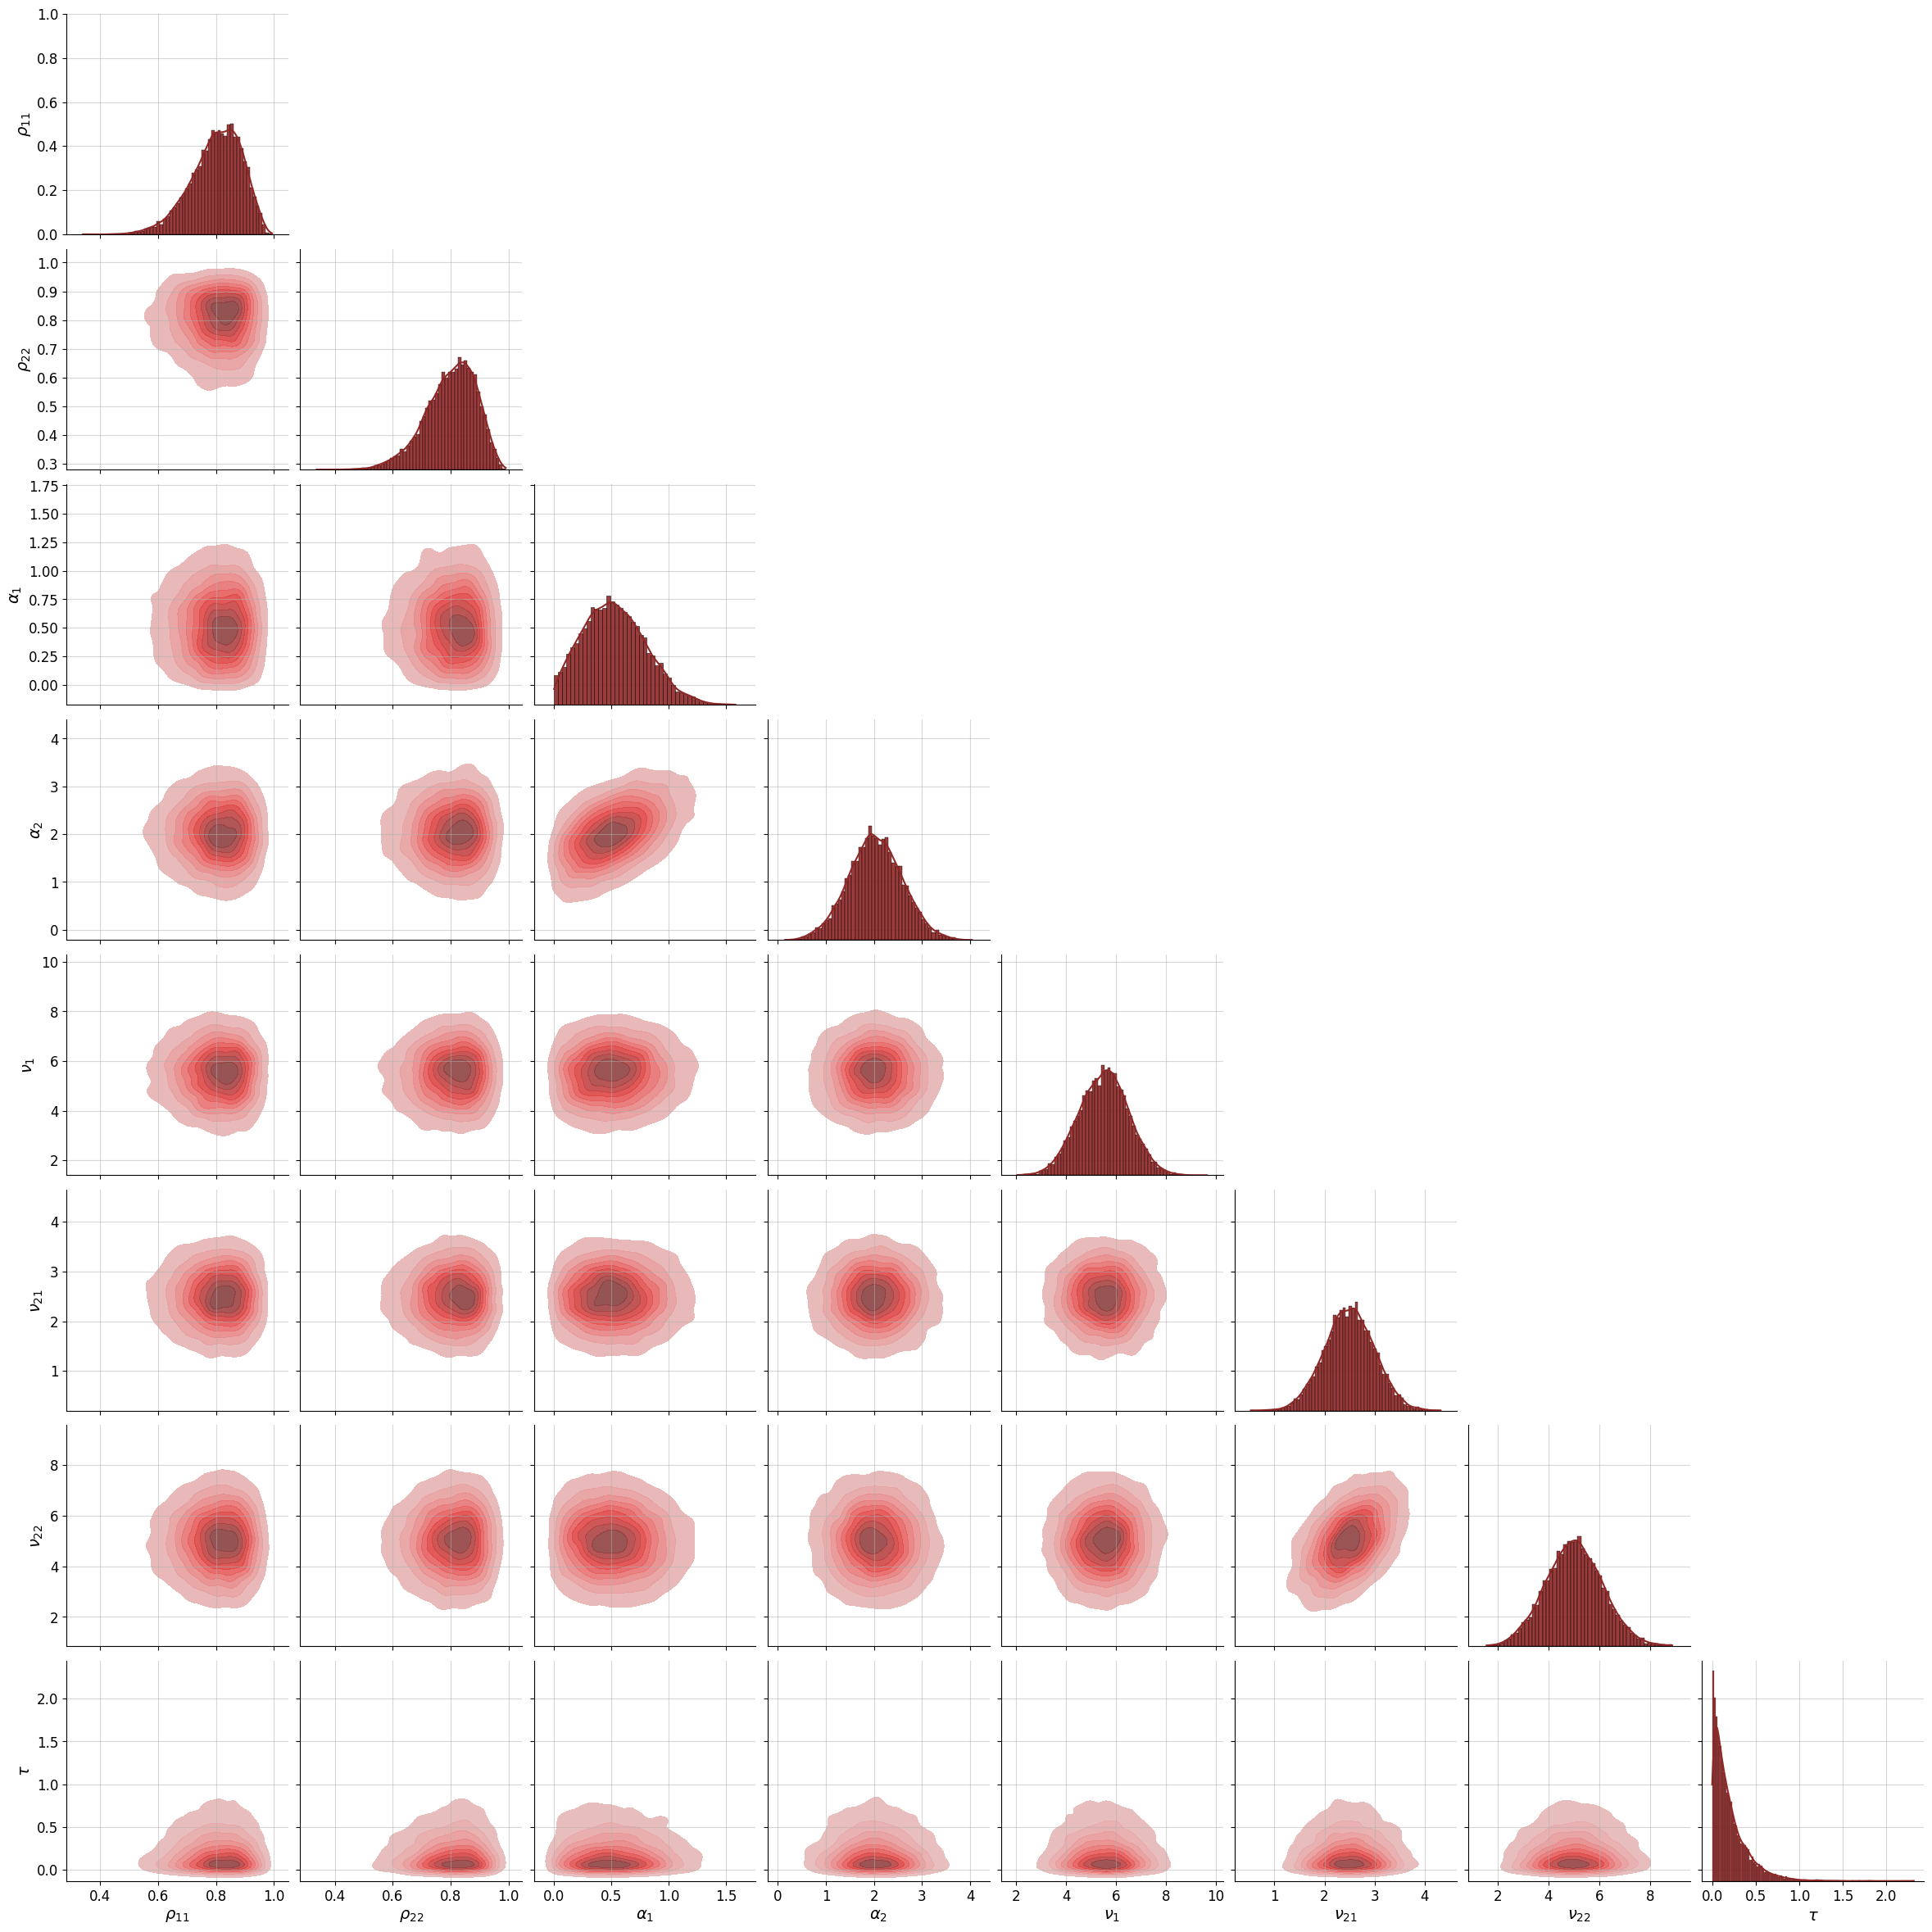

In [9]:
par = constrain_parameters(par, rts)
print(np.mean(par, axis=0))
f=bf.diagnostics.plot_posterior_2d(par, param_names=model.param_names["constrained"])

In [10]:
rts = df['sim_data'][...,0]
rts

array([[0.93659043, 1.10395528, 0.84647996, ..., 0.78075521, 0.78199011,
        0.77607725],
       [0.42555493, 0.41271504, 0.4153784 , ..., 0.47572743, 0.38348254,
        0.43945033],
       [0.82915939, 0.84895456, 0.88095832, ..., 1.17671483, 1.24722076,
        1.20701978],
       ...,
       [0.45596269, 0.51330575, 0.34286188, ..., 0.2019149 , 0.14923925,
        0.13632583],
       [0.78695759, 0.67804548, 0.74426243, ..., 0.64468905, 0.79249821,
        0.63302195],
       [0.60493271, 0.66561789, 0.53998987, ..., 0.30200507, 0.28430529,
        0.46144144]])

In [11]:
responses = df['sim_data'][...,1]
responses

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 0., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [12]:
states = df['sim_data'][...,2]
states

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

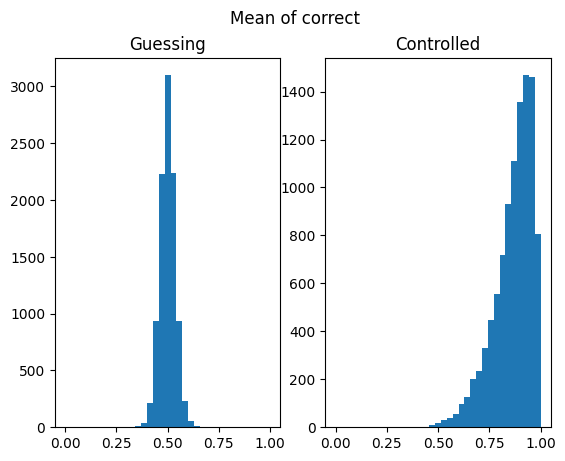

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=1)

for i, state in enumerate(['Guessing', 'Controlled']):
    f=axs[i].hist(np.nanmean(np.where(states==i, responses, np.nan), axis=1), bins=np.linspace(0, 1, 36))
    f=axs[i].set_title(state)
f=fig.suptitle("Mean of correct")

/var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/ipykernel_48150/3755053843.py:8: RuntimeWarning: Mean of empty slice
  f=axs[i,j].hist(np.nanmean(np.where(np.all([states==i, responses==j], axis=0), rts, np.nan), axis=1), bins=bins)


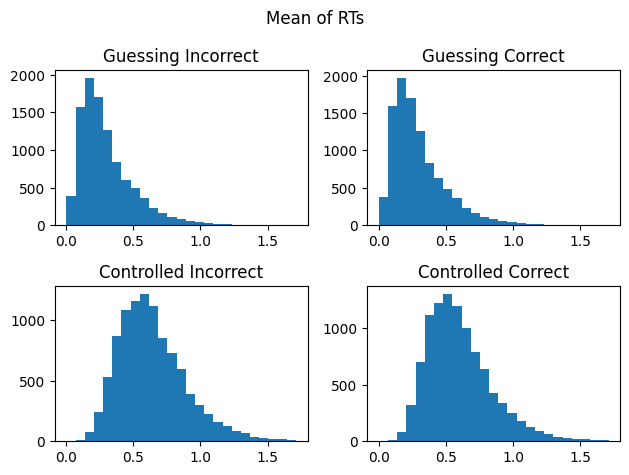

In [14]:
fig, axs = plt.subplots(ncols=2, nrows=2)

bins = np.linspace(0.0, np.quantile(np.mean(rts, axis=-1), q=0.999), 26)

for i, state in enumerate(['Guessing', 'Controlled']):
    for j, response in enumerate(['Incorrect', 'Correct']):
        f=axs[i,j].set_title("{} {}".format(state, response))
        f=axs[i,j].hist(np.nanmean(np.where(np.all([states==i, responses==j], axis=0), rts, np.nan), axis=1), bins=bins)
f=fig.suptitle("Mean of RTs")
f=fig.tight_layout()

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


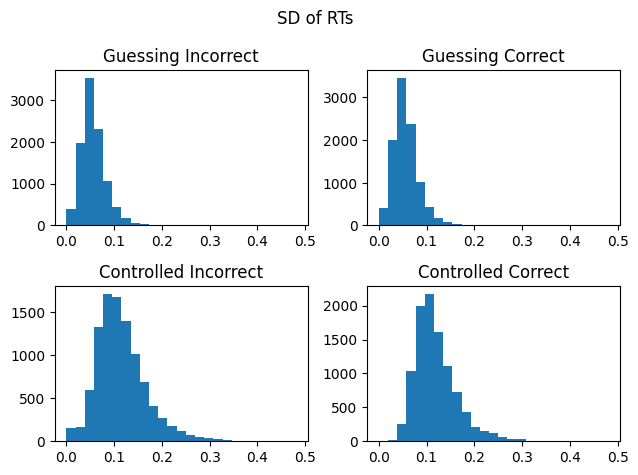

In [15]:
fig, axs = plt.subplots(ncols=2, nrows=2)

bins = np.linspace(0.0, np.quantile(np.std(rts, axis=-1), q=0.999), 26)

for i, state in enumerate(['Guessing', 'Controlled']):
    for j, response in enumerate(['Incorrect', 'Correct']):
        f=axs[i,j].set_title("{} {}".format(state, response))
        f=axs[i,j].hist(np.nanstd(np.where(np.all([states==i, responses==j], axis=0), rts, np.nan), axis=1), bins=bins)
f=fig.suptitle("SD of RTs")
f=fig.tight_layout()